# Trabalho

### Dataset escolhido : [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
pd.options.display.float_format = '{:,.2f}'.format

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014BD71130F0>,
      dtype=object)

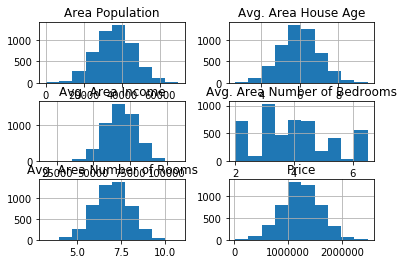

In [36]:
df = pd.read_csv(r'C:\Users\posgrad\Documents\intro-ds\data\USA_HOUSING.csv')
df.hist()

In [22]:
df.drop(columns=['Address'], inplace=True)

In [33]:
# Correlação
x = df.drop(columns='Price')
y = df['Price']
x.corrwith(y)

Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Area Population                 0.408556
dtype: float64

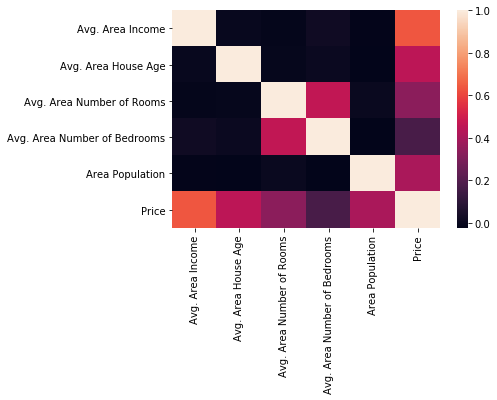

In [35]:
sns.heatmap(df.corr())

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [76]:
lr = LinearRegression()

In [77]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
print("========Resultados========")
print("Intercept", lr.intercept_)
coeff_df = pd.DataFrame(lr.coef_, x.columns, columns=['Coefficient'])
print("Cofficients:")
print(coeff_df.head())

========Resultados========
Intercept -2641372.6673014546
Cofficients:
                                Coefficient
Avg. Area Income                  21.617635
Avg. Area House Age           165221.119872
Avg. Area Number of Rooms     121405.376596
Avg. Area Number of Bedrooms    1318.718783
Area Population                   15.225196


In [86]:
lr.predict(np.array([[79000, 6,  7, 3, 40000]]))

array([1520548.8290485])

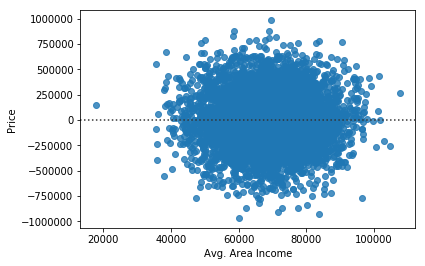

In [92]:
sns.residplot(x='Avg. Area Income', y='Price', data=df)

In [101]:
predictions = lr.predict(X_test)
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, predictions)))
print('R2: %.2f' % r2_score(y_test, predictions))
print('MAE: %.2f' % mean_absolute_error(y_test, predictions))

RMSE: 100842.08
R2: 0.92
MAE: 81257.56
